# Loan Default Prediction using Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# Data Preparation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_csv("Default_Fin.csv")

# Handle Missing Values
imputer = SimpleImputer(strategy="mean")  # Use mean imputation
df["Bank Balance"] = imputer.fit_transform(df[["Bank Balance"]])
df["Annual Salary"] = imputer.fit_transform(df[["Annual Salary"]])

# Handle Outliers (using manual winsorization)
def winsorize_column(column, lower_limit, upper_limit):
    p = np.percentile(column, [lower_limit, upper_limit])
    column[column < p[0]] = p[0]
    column[column > p[1]] = p[1]
    return column

df["Bank Balance"] = winsorize_column(df["Bank Balance"], 5, 95)
df["Annual Salary"] = winsorize_column(df["Annual Salary"], 5, 95)

# Format Conversion (if needed)
# If any categorical variables need conversion, use appropriate encoding methods

# Splitting Data
X = df[["Employed", "Bank Balance", "Annual Salary"]]  # Features
y = df["Defaulted?"]  # Target variable

# Scaling or Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Rename the column
df = df.rename(columns={"Defaulted?": "Defaulted"})

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine the dataset
print(df.head())  # Display the first few rows of the dataset

   Index  Employed  Bank Balance  Annual Salary  Defaulted
0      1         1       8754.36     532339.560          0
1      2         0       9806.16     161181.228          0
2      3         1      12882.60     381205.680          0
3      4         1       6351.00     428453.880          0
4      5         1       9427.92     461562.000          0


In [6]:
print(df.info())  # Get information about the dataset, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB
None


In [7]:
print(df.describe())  # Statistical summary of numerical features

             Index      Employed  Bank Balance  Annual Salary     Defaulted
count  10000.00000  10000.000000  10000.000000   10000.000000  10000.000000
mean    5000.50000      0.705600   9899.820996  400951.079556      0.033300
std     2886.89568      0.455795   5535.448651  152529.907356      0.179428
min        1.00000      0.000000      5.142000  161181.228000      0.000000
25%     2500.75000      0.000000   5780.790000  256085.520000      0.000000
50%     5000.50000      1.000000   9883.620000  414631.740000      0.000000
75%     7500.25000      1.000000  13995.660000  525692.760000      0.000000
max    10000.00000      1.000000  19991.496000  656134.650000      1.000000


# Data Exploration

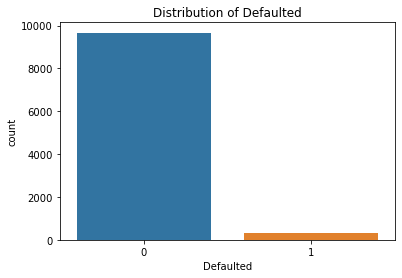

In [8]:
# Explore the distribution of the target variable (Defaulted)
sns.countplot(x="Defaulted", data=df)
plt.title("Distribution of Defaulted")
plt.show()

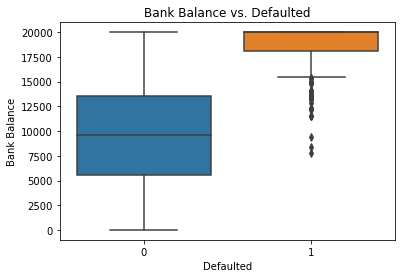

In [9]:
# Explore the relationship between features and the target variable
sns.boxplot(x="Defaulted", y="Bank Balance", data=df)
plt.title("Bank Balance vs. Defaulted")
plt.show()

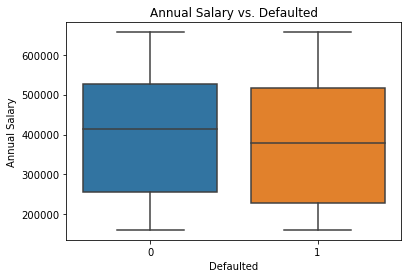

In [10]:
sns.boxplot(x="Defaulted", y="Annual Salary", data=df)
plt.title("Annual Salary vs. Defaulted")
plt.show()

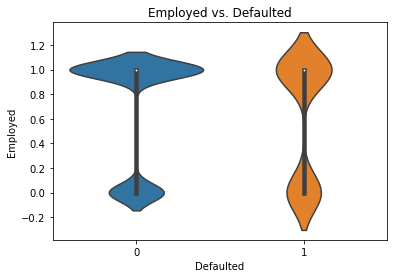

In [11]:
sns.violinplot(x="Defaulted", y="Employed", data=df)
plt.title("Employed vs. Defaulted")
plt.show()

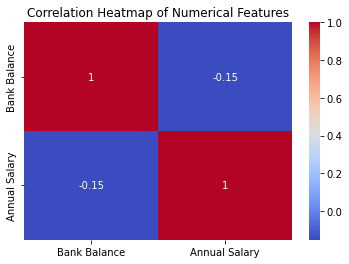

In [12]:
# Correlation heatmap of numerical features
numerical_features = ["Bank Balance", "Annual Salary"]
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Feature Engineering

In [13]:
# Feature Engineering
df["Debt-to-Income Ratio"] = df["Bank Balance"] / df["Annual Salary"]

# Verify the new feature
print(df.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted  \
0      1         1       8754.36     532339.560          0   
1      2         0       9806.16     161181.228          0   
2      3         1      12882.60     381205.680          0   
3      4         1       6351.00     428453.880          0   
4      5         1       9427.92     461562.000          0   

   Debt-to-Income Ratio  
0              0.016445  
1              0.060839  
2              0.033794  
3              0.014823  
4              0.020426  


# Model Training and Selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and Train Different Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the Model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC Score": roc_auc
    }

# Print the Results
for model_name, metrics in results.items():
    print(f"Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Metrics for Logistic Regression:
Accuracy: 0.9655
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Metrics for Decision Tree:
Accuracy: 0.9555
Precision: 0.32142857142857145
Recall: 0.2608695652173913
F1 Score: 0.28800000000000003
ROC AUC Score: 0.6205953211897417

Metrics for Random Forest:
Accuracy: 0.9565
Precision: 0.32
Recall: 0.2318840579710145
F1 Score: 0.2689075630252101
ROC AUC Score: 0.6071383003474958

Metrics for Gradient Boosting:
Accuracy: 0.964
Precision: 0.4117647058823529
Recall: 0.10144927536231885
F1 Score: 0.16279069767441862
ROC AUC Score: 0.5481353057288031



In [15]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and Train the Model
model = GaussianNB()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9655
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
